# Rona Habibi

## Research question/interests

**Is there a distinct relationship between an increase in emission and an increase in natural disasters? Can we assume that the natural disasters are induced by rising emission rates?**

#### I am interested in the relationship between an increase over time of natural disasters and carbon dioxide emission in relation to climate change.

###### Let's start by importing:

In [ ]:
#xyz = project_functionsRona.num_nd_yearly()
import sys
sys.path.append('..')
from analysis.code import project_functionsRona as pt
pt.processed_nd_data()


,Year,Continent,Disaster Type,Number of Disasters,Difference_from_Previous_Year,Percent_Difference_from_Previous_Year
0,1970,Africa,Drought,1,NaN,NaN
1,1970,Africa,Flood,2,NaN,NaN
2,1970,Africa,Storm,1,NaN,NaN
3,1970,Americas,Drought,1,0.0,0.000000
4,1970,Americas,Flood,15,13.0,650.000000
...,...,...,...,...,...,...
1014,2021,Europe,Wildfire,5,3.0,150.000000
1015,2021,Oceania,Drought,1,-4.0,-80.000000
1016,2021,Oceania,Flood,5,-16.0,-76.190476
1017,2021,Oceania,Storm,6,-2.0,-25.000000


In [ ]:
def processed_nd_data():
    dfclean = (pd.read_csv("../data/raw/1900_2021_DISASTERS.csv")
           .query('`Disaster Type` in ["Flood", "Storm", "Drought", "Wildfire", "Landslide"]')
           .iloc[:, [1, 5, 6, 10, 12, 13]]
           .dropna()
          )
    return dfclean
processed_nd_data()

,Year,Disaster Subgroup,Disaster Type,Country,Region,Continent
0,1970,Hydrological,Flood,Argentina,South America,Americas
1,1970,Meteorological,Storm,Australia,Australia and New Zealand,Oceania
2,1970,Hydrological,Flood,Benin,Western Africa,Africa
3,1970,Meteorological,Storm,Bangladesh,Southern Asia,Asia
4,1970,Meteorological,Storm,Bangladesh,Southern Asia,Asia
...,...,...,...,...,...,...
14638,2021,Hydrological,Flood,Yemen,Western Asia,Asia
14639,2021,Hydrological,Flood,Yemen,Western Asia,Asia
14640,2021,Hydrological,Flood,South Africa,Southern Africa,Africa
14642,2021,Hydrological,Flood,Serbia,Southern Europe,Europe


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df_nd = pd.read_csv("../data/raw/1900_2021_DISASTERS.csv") # Natural Disasters dataframe
df_nd.head(5)

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
df_emis = pd.read_csv("../data/raw/owid_emissions.csv") # Emissions dataframe
df_emis.head(-5)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46513,Zimbabwe,2012,ZWE,13265331.0,2.090997e+10,0.566,0.043,11.254,0.891,8.594,...,NaN,0.0,0.0,0.297,0.032,NaN,42.29,30.72,0.835,7.418
46514,Zimbabwe,2013,ZWE,13555420.0,2.112350e+10,0.463,0.034,11.671,0.418,3.711,...,NaN,0.0,0.0,0.281,0.035,NaN,42.17,30.61,0.682,5.842
46515,Zimbabwe,2014,ZWE,13855758.0,2.122250e+10,0.496,0.036,11.946,0.275,2.354,...,NaN,0.0,0.0,0.234,0.032,NaN,40.39,28.90,0.990,8.284
46516,Zimbabwe,2015,ZWE,14154937.0,2.102745e+10,0.585,0.041,12.255,0.309,2.585,...,NaN,0.0,0.0,0.199,0.030,NaN,42.30,30.70,1.333,10.879


# Exploring the Emission's Data

In [ ]:
df_em = df_emis.drop(df_emis[df_emis["year"] < 1970].index).iloc[:, [0, 1, 3, 7, 9 ]]
df_em.head

<bound method NDFrame.head of            country  year  population     co2  co2_growth_prct
120    Afghanistan  1970  10752973.0   1.670           77.469
121    Afghanistan  1971  11015853.0   1.894           13.360
122    Afghanistan  1972  11286753.0   1.530          -19.181
123    Afghanistan  1973  11575308.0   1.635            6.868
124    Afghanistan  1974  11869881.0   1.913           16.980
...            ...   ...         ...     ...              ...
46518     Zimbabwe  2017  14751101.0   9.596           -8.899
46519     Zimbabwe  2018  15052191.0  11.795           22.920
46520     Zimbabwe  2019  15354606.0  11.115           -5.772
46521     Zimbabwe  2020  15669663.0  10.608           -4.559
46522     Zimbabwe  2021  15993525.0  11.296            6.488

[13450 rows x 5 columns]>

# Cleaning and Exploring the Natural Disaster's Data


In [ ]:
df_nd.describe()

,Year,Seq,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
count,14644.000000,14644.000000,6.770000e+02,4.569000e+03,14644.000000,14376.000000,11577.000000,14644.000000,14095.000000,11650.000000,10199.000000,3.651000e+03,8.846000e+03,2.249000e+03,1.104100e+04,3.100000e+01,1.094000e+03,4.863000e+03,14329.000000
mean,2001.596422,731.604958,1.254136e+05,5.093532e+04,2001.606323,6.411241,15.207912,2001.655763,6.549273,15.792618,361.813119,2.486686e+03,8.889099e+05,7.229559e+04,7.277392e+05,2.392251e+06,7.999424e+05,7.746866e+05,68.762532
std,12.538572,1912.021531,2.997875e+06,3.211007e+05,12.535872,3.393997,8.964592,12.537387,3.351351,8.872079,6495.045853,3.402404e+04,8.680288e+06,5.271422e+05,7.851210e+06,5.229397e+06,3.060283e+06,4.901266e+06,21.429182
min,1970.000000,1.000000,1.000000e+00,-5.700000e+01,1970.000000,1.000000,1.000000,1970.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,8.400000e+01,3.400000e+01,2.000000e+00,15.001282
25%,1993.000000,130.000000,1.750000e+02,7.000000e+00,1993.000000,4.000000,7.000000,1993.000000,4.000000,8.000000,5.000000,1.200000e+01,1.200000e+03,5.140000e+02,6.320000e+02,1.200000e+04,5.000000e+04,1.000000e+04,55.816107
50%,2003.000000,304.000000,7.210000e+02,1.800000e+02,2003.000000,7.000000,15.000000,2003.000000,7.000000,16.000000,16.000000,5.000000e+01,1.000000e+04,3.000000e+03,5.736000e+03,1.940000e+05,1.725000e+05,7.100000e+04,69.500473
75%,2012.000000,503.000000,3.511000e+03,1.515000e+04,2012.000000,9.000000,23.000000,2012.000000,9.000000,24.000000,50.000000,2.000000e+02,8.855250e+04,1.600000e+04,5.600000e+04,1.520376e+06,5.000000e+05,3.500000e+05,86.912465
max,2021.000000,9881.000000,7.800000e+07,1.302587e+07,2021.000000,12.000000,31.000000,2021.000000,12.000000,31.000000,300000.000000,1.800000e+06,3.300000e+08,1.585000e+07,3.300000e+08,2.500000e+07,6.000000e+07,2.100000e+08,100.000000


Let us get a more clear look on the many columns in our dataset and their contents for our EDA:

In [ ]:
# let's see all the types of collumns and how many values each one has 
column_info = df_nd.dtypes
column_data = {}

for col in df_nd.columns:
    num_items = df_nd[col].count()
    column_data[col] = num_items

for col, num_items in column_data.items():
    print(col, num_items)


Dis No 14644
Year 14644
Seq 14644
Glide 1581
Disaster Group 14644
Disaster Subgroup 14644
Disaster Type 14644
Disaster Subtype 11897
Disaster Subsubtype 1044
Event Name 3645
Country 14644
ISO 14644
Region 14644
Continent 14644
Location 13298
Origin 3780
Associated Dis 3232
Associated Dis2 698
OFDA Response 1450
Appeal 2440
Declaration 3127
Aid Contribution 677
Dis Mag Value 4569
Dis Mag Scale 13571
Latitude 2331
Longitude 2335
Local Time 765
River Basin 1285
Start Year 14644
Start Month 14376
Start Day 11577
End Year 14644
End Month 14095
End Day 11650
Total Deaths 10199
No Injured 3651
No Affected 8846
No Homeless 2249
Total Affected 11041
Reconstruction Costs ('000 US$) 31
Insured Damages ('000 US$) 1094
Total Damages ('000 US$) 4863
CPI 14329
Adm Level 7855
Admin1 Code 4581
Admin2 Code 3965
Geo Locations 7855


#### lets take a look at all the different types of Disasters

In [ ]:
df_nd.value_counts("Disaster Type")

Disaster Type
Flood                    5272
Storm                    4005
Epidemic                 1436
Earthquake               1137
Landslide                 713
Drought                   685
Extreme temperature       584
Wildfire                  452
Volcanic activity         222
Insect infestation         93
Mass movement (dry)        41
Glacial lake outburst       2
Animal accident             1
Impact                      1
dtype: int64

In [ ]:
top5_list =["Flood", "Storm", "Drought", "Wildfire", "Landslide"]
nat_dis5 = df_nd[df_nd["Disaster Type"].isin(top5_list)].reset_index()
nat_dis5.head(-5)

,index,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11117,14633,2021-0373-VCT,2021,373,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,...,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11118,14634,2021-0269-VEN,2021,269,NaN,Natural,Hydrological,Flood,NaN,NaN,...,NaN,1200.0,NaN,NaN,NaN,NaN,2,NaN,32029,Tulio Febres Cordero (Adm2).
11119,14635,2021-0171-VNM,2021,171,NaN,Natural,Meteorological,Storm,Convective storm,Severe storm,...,1000.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11120,14636,2021-0217-VNM,2021,217,NaN,Natural,Hydrological,Flood,Flash flood,NaN,...,NaN,180.0,NaN,NaN,NaN,NaN,1;2,3345,32447;32671,"Ha Giang (Adm1). Tran Yen, Van Ban (Adm2)."


##### Let us remove the data that is irrelavant to my research question. In short lets keep the columns Country, Region and Contient for our plots to keep track of locations. Let us also keep the Disaster Types and Subgroups and Year so we can track "how many of what happened where?".

In [ ]:
dfclean = nat_dis5.iloc[:,[2,6,7,11,13,14]]
dfclean= dfclean.dropna()
dfclean.head(-5)


,Year,Disaster Subgroup,Disaster Type,Country,Region,Continent
0,1970,Hydrological,Flood,Argentina,South America,Americas
1,1970,Meteorological,Storm,Australia,Australia and New Zealand,Oceania
2,1970,Hydrological,Flood,Benin,Western Africa,Africa
3,1970,Meteorological,Storm,Bangladesh,Southern Asia,Asia
4,1970,Meteorological,Storm,Bangladesh,Southern Asia,Asia
...,...,...,...,...,...,...
11117,2021,Meteorological,Storm,Saint Vincent and the Grenadines,Caribbean,Americas
11118,2021,Hydrological,Flood,Venezuela (Bolivarian Republic of),South America,Americas
11119,2021,Meteorological,Storm,Viet Nam,South-Eastern Asia,Asia
11120,2021,Hydrological,Flood,Viet Nam,South-Eastern Asia,Asia


##### Let's summarize what we did into one function: 

In [ ]:
def cleaned_nd_data():
    dfclean = (pd.read_csv("../data/raw/1900_2021_DISASTERS.csv")
           .query('`Disaster Type` in ["Flood", "Storm", "Drought", "Wildfire", "Landslide"]')
           .iloc[:, [1, 5, 6, 10, 12, 13]]
           .dropna()
          )
    return dfclean 
cleaned_nd_data()

,Year,Disaster Subgroup,Disaster Type,Country,Region,Continent
0,1970,Hydrological,Flood,Argentina,South America,Americas
1,1970,Meteorological,Storm,Australia,Australia and New Zealand,Oceania
2,1970,Hydrological,Flood,Benin,Western Africa,Africa
3,1970,Meteorological,Storm,Bangladesh,Southern Asia,Asia
4,1970,Meteorological,Storm,Bangladesh,Southern Asia,Asia
...,...,...,...,...,...,...
14638,2021,Hydrological,Flood,Yemen,Western Asia,Asia
14639,2021,Hydrological,Flood,Yemen,Western Asia,Asia
14640,2021,Hydrological,Flood,South Africa,Southern Africa,Africa
14642,2021,Hydrological,Flood,Serbia,Southern Europe,Europe


In [ ]:
ndperyear = dfclean.groupby(['Year', 'Continent', 'Disaster Type']).size()
ndperyear
df_ndperyear = ndperyear.reset_index(name='Number of Disasters')
df_ndperyear

,Year,Continent,Disaster Type,Number of Disasters
0,1970,Africa,Drought,1
1,1970,Africa,Flood,2
2,1970,Africa,Storm,1
3,1970,Americas,Drought,1
4,1970,Americas,Flood,15
...,...,...,...,...
1014,2021,Europe,Wildfire,5
1015,2021,Oceania,Drought,1
1016,2021,Oceania,Flood,5
1017,2021,Oceania,Storm,6


In [ ]:
df_ndperyear['Difference from Previous Year'] = df_ndperyear.groupby('Disaster Type')['Number of Disasters'].diff()
df_ndperyear

,Year,Continent,Disaster Type,Number of Disasters,Difference from Previous Year
0,1970,Africa,Drought,1,NaN
1,1970,Africa,Flood,2,NaN
2,1970,Africa,Storm,1,NaN
3,1970,Americas,Drought,1,0.0
4,1970,Americas,Flood,15,13.0
...,...,...,...,...,...
1014,2021,Europe,Wildfire,5,3.0
1015,2021,Oceania,Drought,1,-4.0
1016,2021,Oceania,Flood,5,-16.0
1017,2021,Oceania,Storm,6,-2.0


In [ ]:
df_ndperyear['Percent Difference from Previous Year'] = (df_ndperyear['Difference from Previous Year'] / df_ndperyear.groupby('Disaster Type')['Number of Disasters'].shift(1)) * 100
df_ndperyear

,Year,Continent,Disaster Type,Number of Disasters,Difference from Previous Year,Percent Difference from Previous Year
0,1970,Africa,Drought,1,NaN,NaN
1,1970,Africa,Flood,2,NaN,NaN
2,1970,Africa,Storm,1,NaN,NaN
3,1970,Americas,Drought,1,0.0,0.000000
4,1970,Americas,Flood,15,13.0,650.000000
...,...,...,...,...,...,...
1014,2021,Europe,Wildfire,5,3.0,150.000000
1015,2021,Oceania,Drought,1,-4.0,-80.000000
1016,2021,Oceania,Flood,5,-16.0,-76.190476
1017,2021,Oceania,Storm,6,-2.0,-25.000000


The 'NaN' values here mean there was no previous year to compare them for in our new column. I will not be changing these to 0 simply because we do not have the prior data and we want to eliminate false data.

#### Here is a short version of what we did:

In [ ]:
def processed_nd_data():
    df_ndperyear = (pd.read_csv("../data/raw/1900_2021_DISASTERS.csv")
                      .query('`Disaster Type` in ["Flood", "Storm", "Drought", "Wildfire", "Landslide"]')
                      .iloc[:, [1, 5, 6, 10, 12, 13]]
                      .dropna()
                      .groupby(['Year', 'Continent', 'Disaster Type'])
                      .size()
                      .reset_index(name='Number of Disasters')
                      .assign(Difference_from_Previous_Year=lambda x: x.groupby('Disaster Type')['Number of Disasters'].diff(),
                              Percent_Difference_from_Previous_Year=lambda x: (x['Difference_from_Previous_Year'] / x.groupby('Disaster Type')['Number of Disasters'].shift(1)) * 100)
                    )
    return df_ndperyear
processed_nd_data()

,Year,Continent,Disaster Type,Number of Disasters,Difference_from_Previous_Year,Percent_Difference_from_Previous_Year
0,1970,Africa,Drought,1,NaN,NaN
1,1970,Africa,Flood,2,NaN,NaN
2,1970,Africa,Storm,1,NaN,NaN
3,1970,Americas,Drought,1,0.0,0.000000
4,1970,Americas,Flood,15,13.0,650.000000
...,...,...,...,...,...,...
1014,2021,Europe,Wildfire,5,3.0,150.000000
1015,2021,Oceania,Drought,1,-4.0,-80.000000
1016,2021,Oceania,Flood,5,-16.0,-76.190476
1017,2021,Oceania,Storm,6,-2.0,-25.000000


#### Let us do some plotting, starting off with a box plot so we can visualize where the majority 50% of types of natural disasters falls in regards to years between 1970 and 2021

<seaborn.axisgrid.FacetGrid>

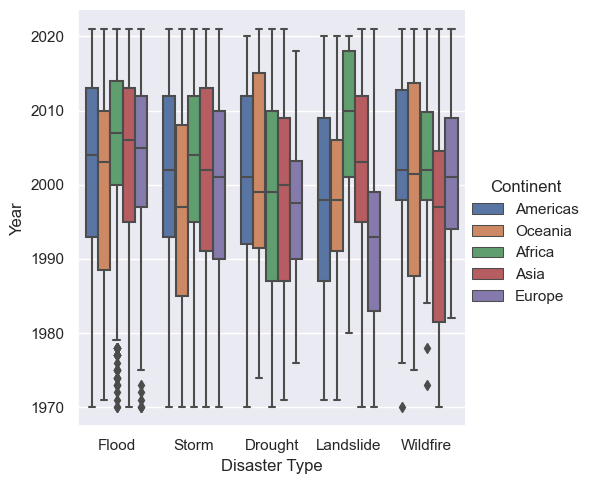

In [ ]:
sns.catplot(data = dfclean, x= "Disaster Type",y = "Year", hue="Continent", kind="box")

This did not get us very far lets do some more EDA!

In [ ]:
df1= dfclean.groupby('Disaster Type')['Year'].count()
df1=df1.to_frame()

df1

,Year
Disaster Type,
Drought,685
Flood,5272
Storm,4005
Wildfire,452


In [ ]:
#Creating new data frame
#I have decided to create a data set which relates the frequency of natural disasters to the year so we can analyze the trends from ovdr the last 50 years.

num_ND = dfclean.groupby('Year')['Disaster Type'].count()
num_ND1 = pd.DataFrame(num_ND)
num_ND1

,Disaster Type
Year,
1970,66
1971,50
1972,53
1973,53
1974,63
1975,54
1976,70
1977,98
1978,102


##### Let us create a basic scatterplot so we can see the trend in natural disaster occurances throughou the year.

[Text(0.5, 1.0, 'Scatter plot showing the frequency of natural disasters around the world since 1970')]

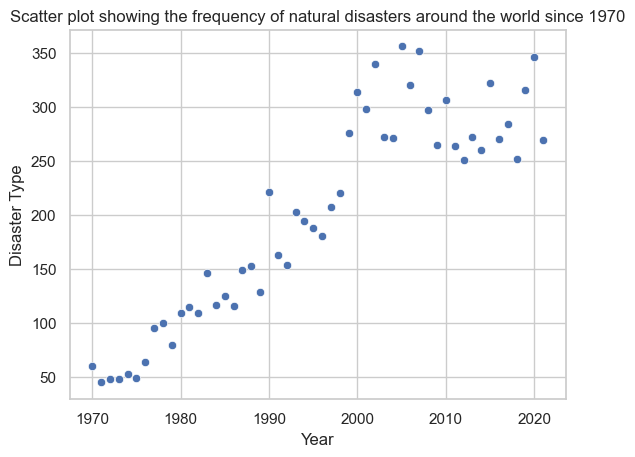

In [ ]:
sns.scatterplot(data = num_ND1, x = "Year", y = "Disaster Type" ).set(title="Scatter plot showing the frequency of natural disasters around the world since 1970")


In [ ]:
dfclean.value_counts("Continent")
continent_list = ["Asia","Americas","Africa", "Europe", "Oceania"]
continents = dfclean[dfclean["Continent"].isin(continent_list)].reset_index()
continents= continents.drop(["index"], axis=1)
continents

,Year,Disaster Subgroup,Disaster Type,Country,Region,Continent
0,1970,Hydrological,Flood,Argentina,South America,Americas
1,1970,Meteorological,Storm,Australia,Australia and New Zealand,Oceania
2,1970,Hydrological,Flood,Benin,Western Africa,Africa
3,1970,Meteorological,Storm,Bangladesh,Southern Asia,Asia
4,1970,Meteorological,Storm,Bangladesh,Southern Asia,Asia
...,...,...,...,...,...,...
10409,2021,Hydrological,Flood,Yemen,Western Asia,Asia
10410,2021,Hydrological,Flood,Yemen,Western Asia,Asia
10411,2021,Hydrological,Flood,South Africa,Southern Africa,Africa
10412,2021,Hydrological,Flood,Serbia,Southern Europe,Europe


<AxesSubplot:xlabel='Year', ylabel='Disaster Type'>

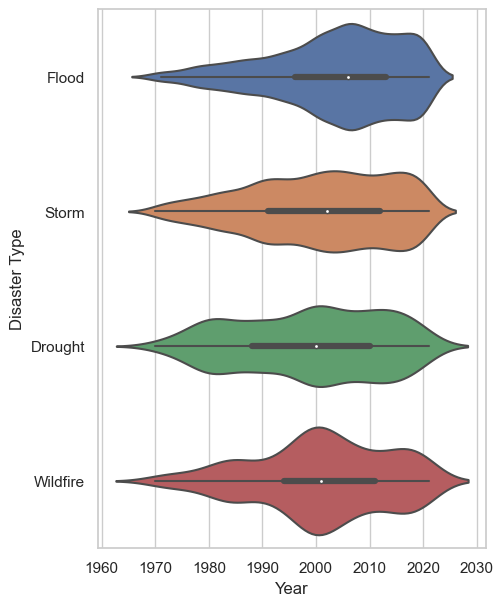

In [ ]:
plt.figure(figsize=(5,7))
sns.violinplot(data=continents, x= "Year", y= "Disaster Type")

#### Let's plot out the number of natural disasters throughout 1970 to 2021:

Text(0.5, 1.0, 'Number of Natural Disasters Per Year')

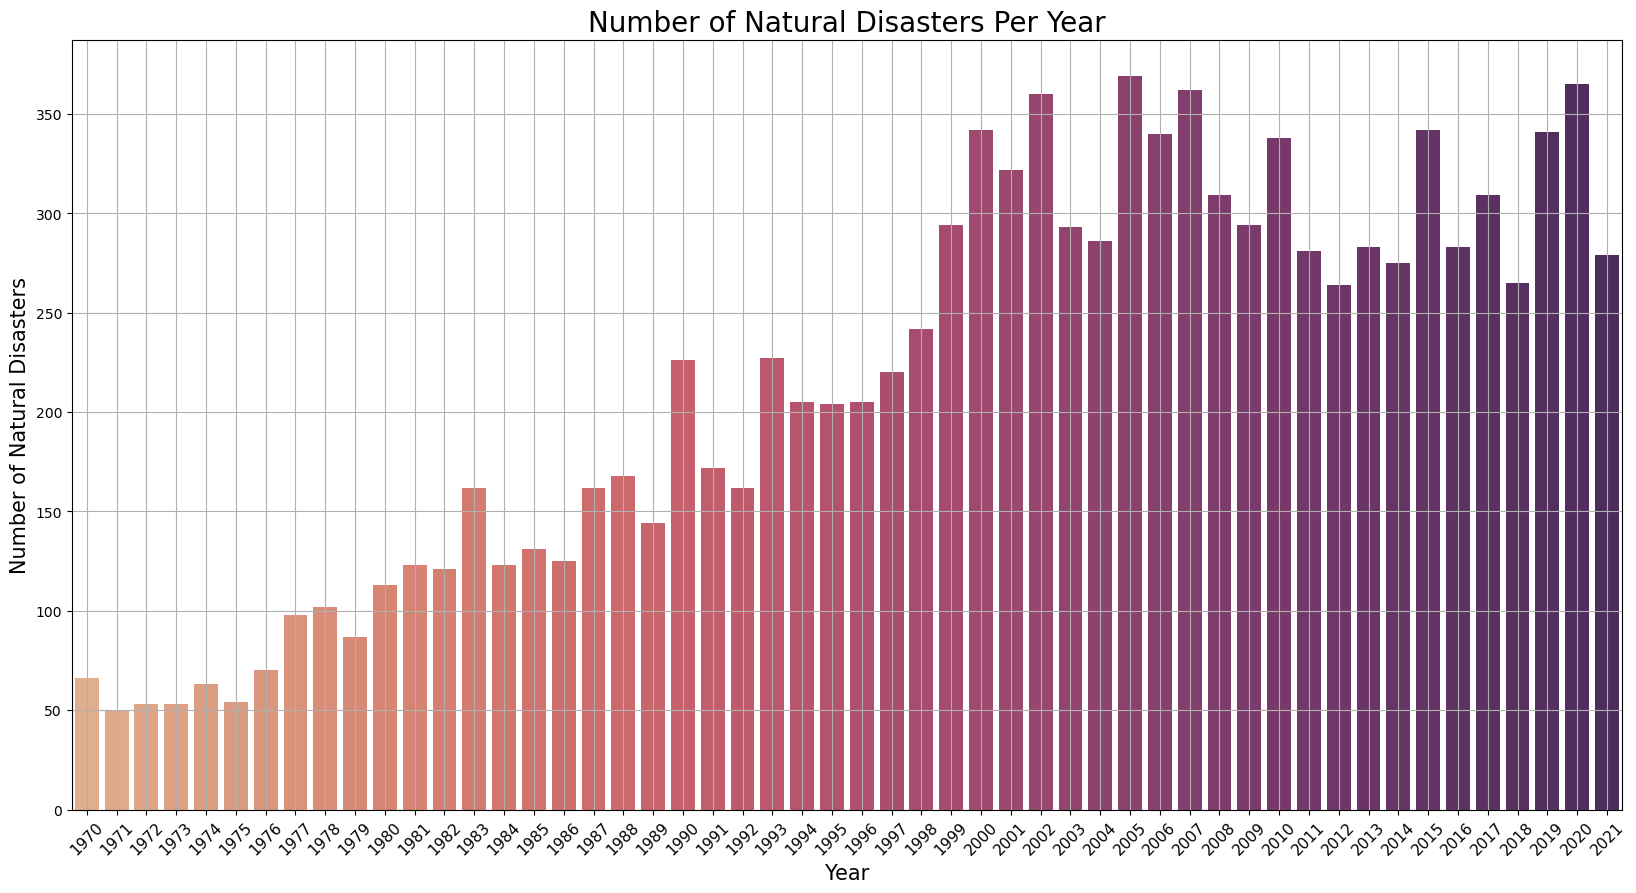

In [ ]:
plt.figure(figsize=(20,10))
ndperyear = sns.countplot(data = dfclean, x='Year', palette = 'flare')
plt.xticks(rotation=45,fontsize = 11)
ndperyear.grid()
ndperyear.set_xlabel("Year", fontsize = 15)
ndperyear.set_ylabel("Number of Natural Disasters", fontsize = 15)
plt.title("Number of Natural Disasters Per Year",fontsize = 20) # maybe change font size?


Now that we have a visual lets recreate this exact one by adding a hue of disaster types to see where the high ends are:

Text(0.5, 1.0, 'Number of Natural Disaster Types Per Year')

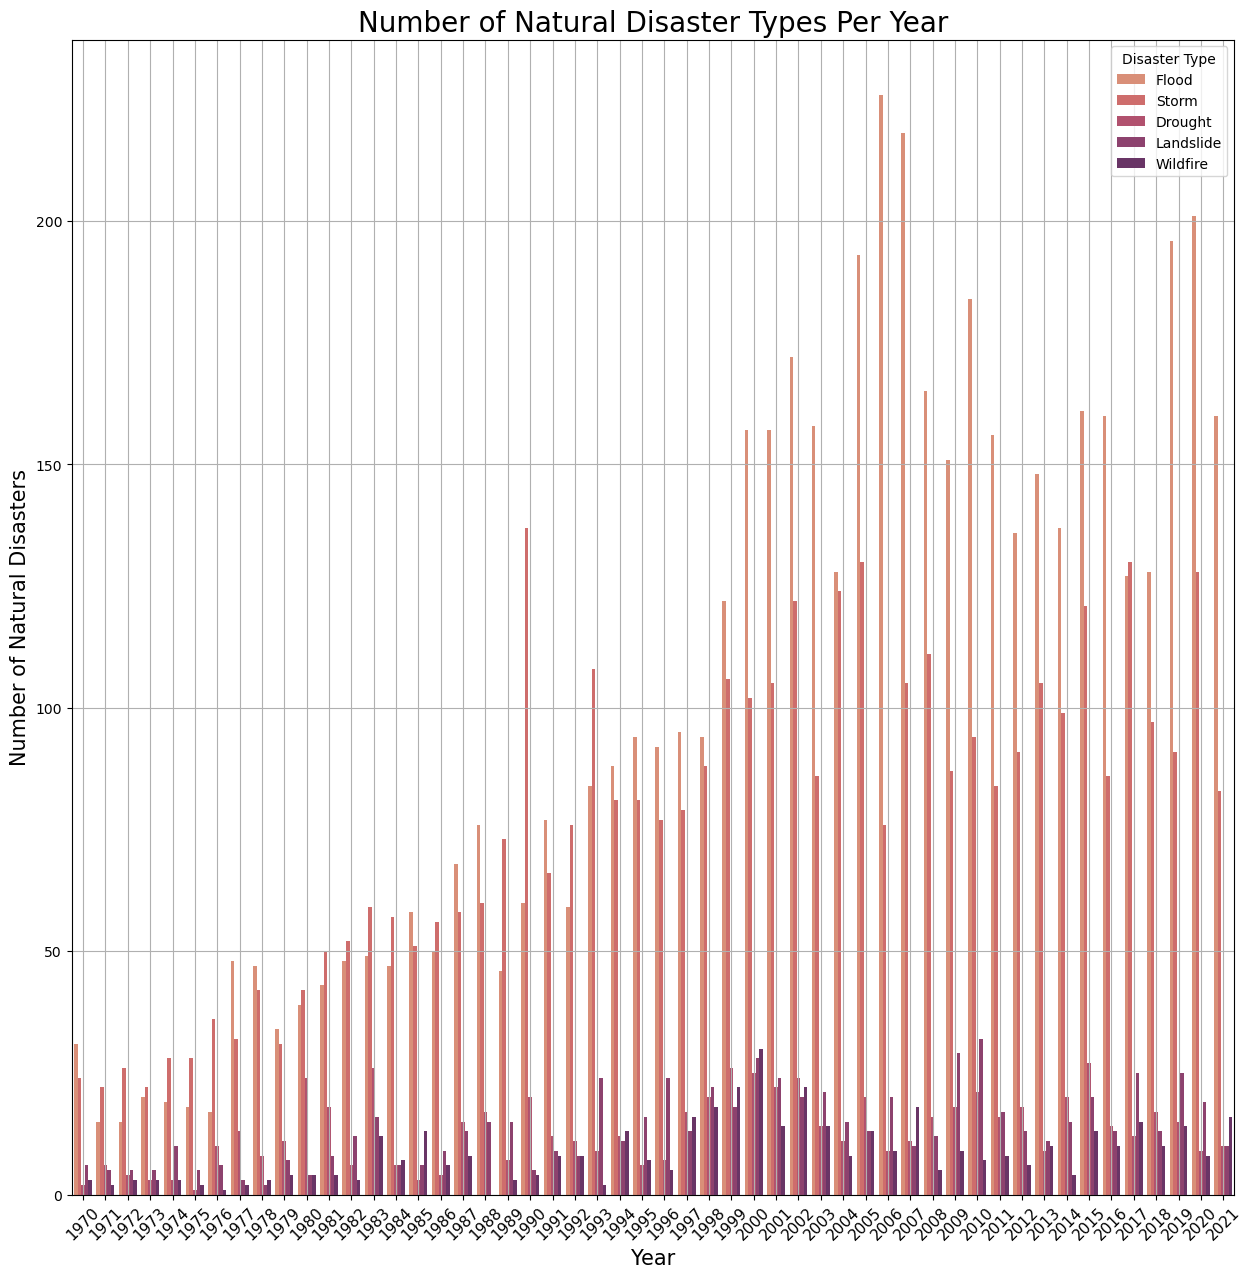

In [ ]:
plt.figure(figsize=(15,15))
ndtperyear = sns.countplot(data = dfclean, x='Year', hue = "Disaster Type", palette = 'flare')
plt.xticks(rotation=45,fontsize = 11)
ndtperyear.grid()
ndtperyear.set_xlabel("Year", fontsize = 15)
ndtperyear.set_ylabel("Number of Natural Disasters", fontsize = 15)
plt.title("Number of Natural Disaster Types Per Year",fontsize = 20)

#### From this graph above, we can see that floods are typically higher in count. Let us take a closer look and investigate specifically floods as a disaster type:

In [ ]:
df_clean1 = df_nd[df_nd["Disaster Type" ]== "Flood"] # we will be removing any rown with epidemic, as we are not interested in natural disasters in diseases.
df_clean1

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
5,1970-0035-BGD,1970,35,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,10000000.0,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
8,1970-0037-BRA,1970,37,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,104371.0,NaN,NaN,46000.0,15.001282,NaN,NaN,NaN,NaN
9,1970-0054-BRB,1970,54,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,210.0,NaN,NaN,500.0,15.001282,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14638,2021-0270-YEM,2021,270,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,22380.0,NaN,NaN,NaN,NaN,1,3407;3408;3411;3419;3420;3421;3424;3425;144970...,NaN,"Abyan, Aden, Al Dhale'e, Al Hudaydah, Hadramau..."
14639,2021-0449-YEM,2021,449,FL-2021-000110,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,67980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14640,2021-0075-ZAF,2021,75,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,400.0,NaN,NaN,75000.0,NaN,1;2,2707;77311;77312;77313;77315,77364;77367,"Free State, KwaZulu-Natal, Limpopo, Mpumalanga..."
14642,2021-0020-SRB,2021,20,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,22.0,NaN,NaN,NaN,NaN,1,25374;25378;25379;25380;25383;25386;25397,NaN,"Jablanicki, Kosovski, Kosovsko-mitrovatski, Ko..."


In [ ]:
dfclean.to_csv("../data/processed/processedNatDisasterData.csv")

After doing this EDA, I believe I will be adapting my research question into some more specifics. I am wondering if, out of the 4 disaster types I have analyzed above, there will be more imminent trend that affect eachother. We can see in one of the plots, as floods increase, logically, droughts decrease. I would also like to learn more and maybe do some additional research on the effects on regions as well as globally.